See here for instructions to set up jupyter lab:
https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab

In [3]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cymr import models
from cymr import network
from psifr import fr
from cfr import task

cfr_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(cfr_dir, 'cfr_eeg_mixed.csv')
pattern_file = os.path.join(cfr_dir, 'cfr_patterns.hdf5')
fit_dir = os.path.join(cfr_dir, 'fits', 'v3', 'cmr_fcf-loc-cat_ff-use')

ImportError: cannot import name 'models' from 'cymr' (/Users/morton/PycharmProjects/cymr/src/cymr/__init__.py)

In [4]:
import json
with open(os.path.join(fit_dir, 'parameters.json'), 'r') as f:
    wp = json.load(f)
wp

{'fixed': {'Afc': 0, 'Acf': 0, 'Aff': 0, 'T': 0.1, 's_use': 1},
 'free': {'Lfc': [0, 1],
  'Lcf': [0, 1],
  'P1': [0, 10],
  'P2': [0.1, 5],
  'B_enc': [0, 1],
  'B_start': [0, 1],
  'B_rec': [0, 1],
  'X1': [0, 1],
  'X2': [0, 5],
  'w0': [0, 1],
  'Dff': [0, 10]},
 'dependent': {'Dfc': '1 - Lfc',
  'Dcf': '1 - Lcf',
  'w_loc': 'w0',
  'w_cat': '1 - w0'},
 'weights': {'fcf': {'loc': 'w_loc', 'cat': 'w_cat'}, 'ff': {'use': 's_use'}}}

In [5]:
results = pd.read_csv(os.path.join(fit_dir, 'fit.csv'), index_col=0)
subj_param = results.loc[1]
subj_param

rep          1.000000
Afc          0.000000
Acf          0.000000
Aff          0.000000
T            0.100000
s_use        1.000000
Lfc          0.141861
Lcf          0.061147
P1           0.210323
P2           1.334435
B_enc        0.725744
B_start      0.820913
B_rec        0.886252
X1           0.007866
X2           0.262218
w0           0.853649
Dff          0.143100
Dfc          0.858139
Dcf          0.938853
w_loc        0.853649
w_cat        0.146351
logl      -852.693885
n          373.000000
k           11.000000
Name: 1, dtype: float64

In [6]:
patterns = network.load_patterns(pattern_file)
data = pd.read_csv(data_file)
list_data = data.loc[(data['subject'] == 1) & (data['list'] == 2)].copy()
list_data = task.set_item_index(list_data, patterns['items'])
list_data

,subject,list,position,trial_type,item,item_index,session,list_type,category,response,response_time,list_category
0,1,2,1,study,SEAN PENN,228.0,1,mixed,cel,3.0,1.255,mixed
1,1,2,2,study,AUDREY HEPBURN,19.0,1,mixed,cel,3.0,1.040,mixed
2,1,2,3,study,ST PATRICKS CATHEDRAL,463.0,1,mixed,loc,2.0,1.164,mixed
3,1,2,4,study,LES INVALIDES,364.0,1,mixed,loc,2.0,0.829,mixed
4,1,2,5,study,GREAT ZIMBABWE RUINS,340.0,1,mixed,loc,3.0,0.872,mixed
5,1,2,6,study,BRYCE CANYON,281.0,1,mixed,loc,2.0,1.241,mixed
6,1,2,7,study,TROPHY,745.0,1,mixed,obj,3.0,0.862,mixed
7,1,2,8,study,BRUSH,548.0,1,mixed,obj,3.0,0.779,mixed
8,1,2,9,study,SUPREME COURT,469.0,1,mixed,loc,2.0,1.245,mixed
9,1,2,10,study,SAN FRANCISCO,444.0,1,mixed,loc,4.0,0.854,mixed


In [7]:
import importlib
importlib.reload(models)
importlib.reload(network)
model = models.CMRDistributed()
state_list = model.record_network(list_data, subj_param, 
                                  patterns=patterns, weights=wp['weights'], 
                                  remove_blank=True)

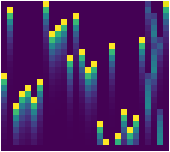

In [18]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(state_list[0][23].w_fc_exp);
ax.set_axis_off()
fig.savefig('/Users/morton/Dropbox/documents/art/cymr/w_fc_exp.png')

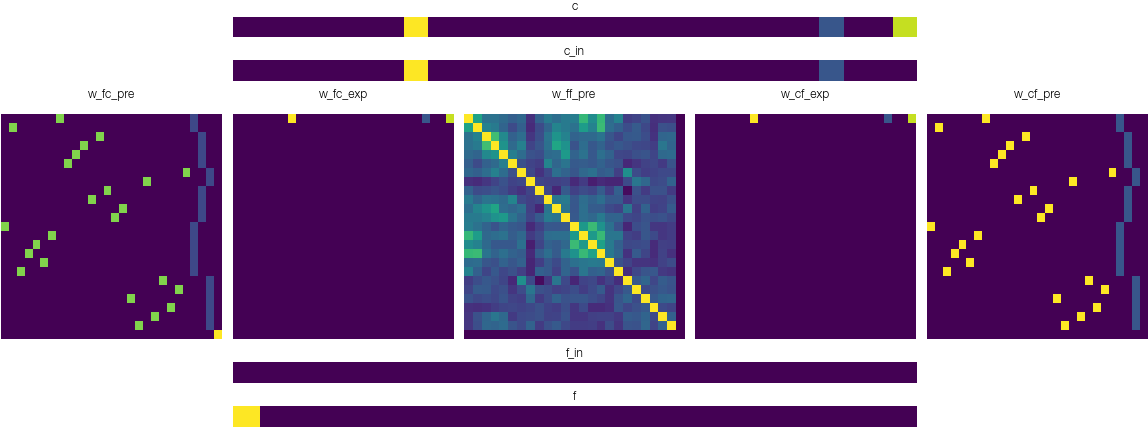

In [6]:
importlib.reload(network)
fig, ax = network.init_plot(figsize=(16, 6))
state = state_list[0]
state[0].plot(ax=ax)

In [7]:
%matplotlib widget
from cymr import network
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

# initialize the plot
fig, ax = network.init_plot(figsize=(14, 6))
states[0].plot(ax=ax)

def update(n=1):
    """Update network data on reach time step."""
    print(n)
    ax['c'].images[0].set_data(states[n].c[None, :])
    ax['c_in'].images[0].set_data(states[n].c_in[None, :])
    ax['f'].images[0].set_data(states[n].f[None, :])
    f_in = states[n].f_in
    ax['f_in'].images[0].set_data(f_in[None, :])
    ax['f_in'].images[0].set_clim(np.min(f_in), np.max(f_in))
    ax['w_fc_exp'].images[0].set_data(state[n].w_fc_exp)
    ax['w_cf_exp'].images[0].set_data(state[n].w_cf_exp)
    layers = ['c', 'c_in', 'f', 'f_in', 
              'w_fc_pre', 'w_fc_exp', 'w_ff_pre', 'w_cf_exp', 'w_cf_pre']
    #for layer in layers:
        #ax[layer].set_aspect(1)

w = interactive(update, n=widgets.IntSlider(min=0, max=len(states) - 1, step=1, value=0))
display(w)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…